In [1]:
#экперемент 1: методы обычного машинного обучения
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier


%matplotlib inline

In [2]:
train_df = pd.read_csv("./train_dataset_train.csv") #read train dataset

In [3]:
train_df.head(7)

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4
5,6443,10,0.280111,0.255778,0.174677,0.327109,0.052556,0.093938,0.000000,0.084180,...,0.550864,0.597998,0.039885,0.773661,0.681998,0.040244,0.377847,0.030631,0.000000,5
6,6889,22,0.065092,0.095285,0.317724,0.092715,0.210422,0.000000,0.103085,0.049388,...,0.108805,0.079312,0.032510,0.000000,0.095017,0.138907,0.030898,0.006197,0.170735,4


In [4]:
train_df = train_df.sort_index(axis=1)# preprocessing, sort by time
train_df.head(7)

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,4,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,2,1294,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,5,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33,4,3685,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048
5,"{""type"":""Polygon"",""coordinates"":[[[52.67253376...",10,5,6443,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,...,0.206912,0.146268,0.000000,0.019088,0.207015,0.406300,0.402006,0.040244,0.000000,0.377847
6,"{""type"":""Polygon"",""coordinates"":[[[32.91307525...",22,4,6889,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,...,0.635466,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898


In [5]:
#train_df.loc[:, ("nd_mean_2021-04-16", 0)] = 1
train_df.iloc[0].to_numpy()[9]

0.0629805547604488

In [6]:
#эксперименты показали что замена 0-лей в датасете средними значениями ничего не дает а только ухудшает точность
# но при желании это можно сделать тут

def approx10(array, index, l):
    sum = 0
    #print(index)
    if ((index - 4) < 5 ):
        for f in range(index+1, index+11):
            sum+=array[f]
    elif(index == l-1):
        for f in range(index-11, index-1):
            sum+=array[f]
    else:
        for f in range(index-6, index-1):
           # print("->",f)
            sum+=array[f]
        if (index < l-6):
            for f in range(index+1, index+7):
                sum+=array[f]
    return sum/10

needRemoveZeros = False

if (needRemoveZeros):
    #data_cols = [name for name in train_df.columns if name.startswith("nd_mean")]
    #print(data_cols)
    for f in range(len(train_df)):
    #    print(f"Stroka:{f}")
        array = train_df.iloc[f].to_numpy()
     #   print(array)
        #array = array.to_numpy()
        l = len(array)
        for index, val in enumerate(array):
            if val == 0:
                if(index >= 3):
                    array[index] = approx10(array, index,l)
        train_df.iloc[f] = array

In [5]:
train_df.head(7)

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,4,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,2,1294,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,5,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33,4,3685,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048
5,"{""type"":""Polygon"",""coordinates"":[[[52.67253376...",10,5,6443,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,...,0.206912,0.146268,0.000000,0.019088,0.207015,0.406300,0.402006,0.040244,0.000000,0.377847
6,"{""type"":""Polygon"",""coordinates"":[[[32.91307525...",22,4,6889,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,...,0.635466,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898


In [8]:
#созддаем обучающую и тестовую выборку для нашегo ML-алгоритма
X = train_df.drop(["id",".geo", "crop"], axis = 1)
y = train_df[["crop"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# обучаем. Эксперементы показали, что именно HistGradientBoostingClassifier с такими параметрами дает лучший результат
clf = HistGradientBoostingClassifier(max_iter=300) #RandomForestClassifier(random_state=0, n_estimators = 70)
clf.fit(X_train,y_train)


c:\users\slagt\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(max_iter=300)

In [11]:
# проверка метрикиHistGradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

HistGradientBoostingClassifier(max_iter=300) 
 0.965216315372918


In [12]:
# создание и выгрузка предсказаний на тестовом датасете
test_df = pd.read_csv("./test_dataset_test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2071 non-null   int64  
 1   area                2071 non-null   int64  
 2   nd_mean_2021-04-16  2071 non-null   float64
 3   nd_mean_2021-04-19  2071 non-null   float64
 4   nd_mean_2021-04-22  2071 non-null   float64
 5   nd_mean_2021-04-26  2071 non-null   float64
 6   nd_mean_2021-04-28  2071 non-null   float64
 7   nd_mean_2021-05-02  2071 non-null   float64
 8   nd_mean_2021-05-04  2071 non-null   float64
 9   nd_mean_2021-05-07  2071 non-null   float64
 10  nd_mean_2021-05-16  2071 non-null   float64
 11  nd_mean_2021-05-17  2071 non-null   float64
 12  nd_mean_2021-05-21  2071 non-null   float64
 13  nd_mean_2021-05-26  2071 non-null   float64
 14  nd_mean_2021-05-27  2071 non-null   float64
 15  nd_mean_2021-05-29  2071 non-null   float64
 16  nd_mea

In [9]:
X = test_df.drop(["id", ".geo", "area"], axis = 1)
#y = test_df[["crop"]]

In [10]:
pred_ftest = clf.predict(X)

In [11]:
test_res = pd.DataFrame(data=pred_ftest, columns = ["crop"])

In [12]:
bad_names = [name for name in test_df.columns if name.startswith("nd_mean")]
bad_names += [".geo"]
bad_names += ["area"]
first_part = test_df.drop(bad_names, axis = 1)
output = pd.concat([first_part, test_res], axis=1)
output

,id,crop
0,611,3
1,6417,2
2,3352,3
3,4224,1
4,3102,6
...,...,...
2066,1743,5
2067,3968,3
2068,3809,2
2069,5485,6


In [13]:
output.to_csv("./output.csv", index=False)

In [14]:
## Эксперимент 2. Нейросеть

In [6]:
# imports
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras.utils import to_categorical 
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, load_model #model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, MaxPooling1D #слои
from tensorflow.keras.metrics import Recall
from tensorflow import device
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.math import exp as TFExp

In [7]:
#create train dataset
train_df_nn = train_df.drop(["id", ".geo", "area"], axis = 1)
train_df_nn.head(7)

,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,3,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.000000,0.077577,0.104442,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,4,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,2,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,0.112471,0.041751,0.037839,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,5,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,4,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,0.000000,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048
5,5,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,0.188795,0.007760,0.327109,...,0.206912,0.146268,0.000000,0.019088,0.207015,0.406300,0.402006,0.040244,0.000000,0.377847
6,4,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,0.113229,0.246601,0.092715,...,0.635466,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898


In [8]:
#data preprocessing
#train_df_nn = train_df.drop(["id", ".geo", "area"], axis = 1)

print(len(train_df_nn))

x = []

y = []

for f in range(len(train_df_nn)):
    x+=  [train_df_nn.iloc[f].to_numpy()[1:-1]]
    y += [train_df_nn.iloc[f].to_numpy()[0]]
x = np.array(x)
y = np.array(y)
print(x[0],y, len(x), len(y), sep='\n')

4830
[1.87150279e-01 7.28459548e-02 2.62299583e-01 2.61777595e-01
 6.31342423e-02 6.29805548e-02 0.00000000e+00 7.75769311e-02
 1.04441628e-01 4.75966354e-04 2.10962613e-02 0.00000000e+00
 0.00000000e+00 1.21798642e-01 5.22023661e-02 8.39696501e-02
 1.58723076e-01 0.00000000e+00 8.85685400e-03 1.02756767e-01
 2.13006491e-01 3.58303598e-01 4.84102213e-01 2.01012720e-01
 4.25571091e-01 1.08999492e-01 2.97079480e-02 8.14980892e-02
 3.97832936e-01 3.84805332e-01 1.59362355e-02 2.71128163e-01
 1.73832968e-01 1.18853864e-01 0.00000000e+00 7.27524531e-03
 1.11821115e-01 4.41994499e-01 0.00000000e+00 3.89020221e-02
 1.72777157e-01 0.00000000e+00 4.12072106e-01 5.07028657e-01
 4.90741174e-01 5.49791218e-01 4.60996076e-01 1.00554557e-01
 1.55038135e-01 1.40596270e-02 2.67843388e-02 7.06968479e-01
 6.91170549e-01 7.11135365e-01 7.31325070e-01 7.18093033e-01
 0.00000000e+00 1.47168812e-01 7.28052621e-01 1.12933390e-01
 7.27515617e-01 0.00000000e+00 7.54858944e-01 0.00000000e+00
 3.08825278e-02 0.0

In [9]:
#создаем обучающую и тестовую выборку для нейронки
x_nn_train = x[0:3830]
y_nn_train = y[0:3830]
y_nn_train = to_categorical(y_nn_train, num_classes=7)

x_nn_test = x[3830:]
y_nn_test = y[3830:]
y_nn_test = to_categorical(y_nn_test, num_classes=7)
print(len(x_nn_train), len(x_nn_test))

3830 1000


In [10]:
# создание и тренировка нейронки. эксперименты показали, что именно такая ахитектура нейронки яввляется наилучшей
model = Sequential()
#model.add(LSTM(4))
model.add(LSTM(13, input_shape=(69,1,), return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU
#model.add(Dense(100, activation='relu')) # добавляем полносвязный слой с указанием количества нейронов и функции активации
model.add(Dense(300, activation='relu'))
#model.add(Dropout(0.3)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
#model.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
#model.add(LSTM(4, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
#model.add(BatchNormalization()) # добавляем слой нормализации данных
#model.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
#model.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
#model.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
#model.add(BatchNormalization()) # добавляем слой нормализации данных
model.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
model.add(Dense(7, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

model_checkpoint_c = ModelCheckpoint(filepath="./LSTM_Dense_best.h5", save_best_only=True, monitor="val_recall",
                                     verbose=1, mode="max")

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=[Recall(name="recall")])
#model.summary()

with device("/cpu:0"):
    history = model.fit(x_nn_train, y_nn_train,
                    epochs=60, 
                    verbose=1, 
                    batch_size=4,
                    callbacks=[model_checkpoint_c],
                    validation_data = (x_nn_test, y_nn_test)
                   )


Epoch 1/60
958/958 [==============================] - ETA: 0s - loss: 0.6077 - recall: 0.6997
Epoch 1: val_recall improved from -inf to 0.92200, saving model to .\LSTM_Dense_best.h5
958/958 [==============================] - 25s 24ms/step - loss: 0.6077 - recall: 0.6997 - val_loss: 0.1935 - val_recall: 0.9220
Epoch 2/60
958/958 [==============================] - ETA: 0s - loss: 0.2056 - recall: 0.9167
Epoch 2: val_recall improved from 0.92200 to 0.94000, saving model to .\LSTM_Dense_best.h5
958/958 [==============================] - 22s 23ms/step - loss: 0.2056 - recall: 0.9167 - val_loss: 0.1328 - val_recall: 0.9400
Epoch 3/60
956/958 [============================>.] - ETA: 0s - loss: 0.1623 - recall: 0.9333
Epoch 3: val_recall did not improve from 0.94000
958/958 [==============================] - 22s 23ms/step - loss: 0.1623 - recall: 0.9334 - val_loss: 0.1566 - val_recall: 0.9380
Epoch 4/60
957/958 [============================>.] - ETA: 0s - loss: 0.1480 - recall: 0.9397
Epoch 4: 

957/958 [============================>.] - ETA: 0s - loss: 0.0842 - recall: 0.9658
Epoch 30: val_recall did not improve from 0.95600
958/958 [==============================] - 23s 24ms/step - loss: 0.0842 - recall: 0.9658 - val_loss: 0.1113 - val_recall: 0.9560
Epoch 31/60
957/958 [============================>.] - ETA: 0s - loss: 0.0705 - recall: 0.9697
Epoch 31: val_recall did not improve from 0.95600
958/958 [==============================] - 24s 25ms/step - loss: 0.0705 - recall: 0.9697 - val_loss: 0.1237 - val_recall: 0.9560
Epoch 32/60
956/958 [============================>.] - ETA: 0s - loss: 0.0754 - recall: 0.9710
Epoch 32: val_recall did not improve from 0.95600
958/958 [==============================] - 23s 24ms/step - loss: 0.0767 - recall: 0.9708 - val_loss: 0.1100 - val_recall: 0.9560
Epoch 33/60
957/958 [============================>.] - ETA: 0s - loss: 0.0811 - recall: 0.9679
Epoch 33: val_recall improved from 0.95600 to 0.96100, saving model to .\LSTM_Dense_best.h5
958

Epoch 60/60
957/958 [============================>.] - ETA: 0s - loss: 0.0621 - recall: 0.9765
Epoch 60: val_recall did not improve from 0.96800
958/958 [==============================] - 23s 24ms/step - loss: 0.0620 - recall: 0.9765 - val_loss: 0.1437 - val_recall: 0.9590


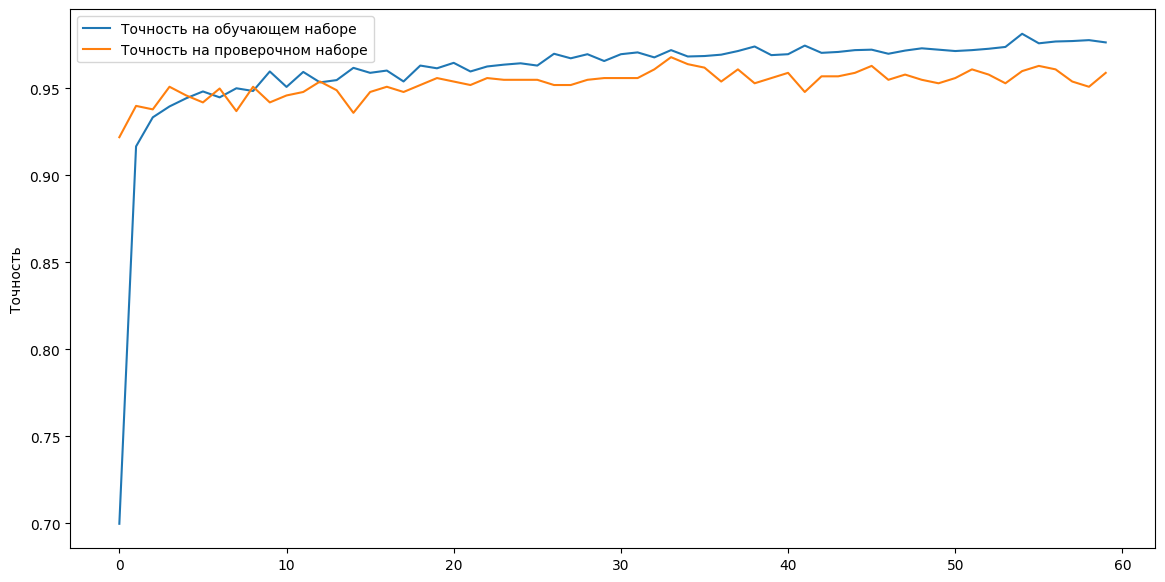

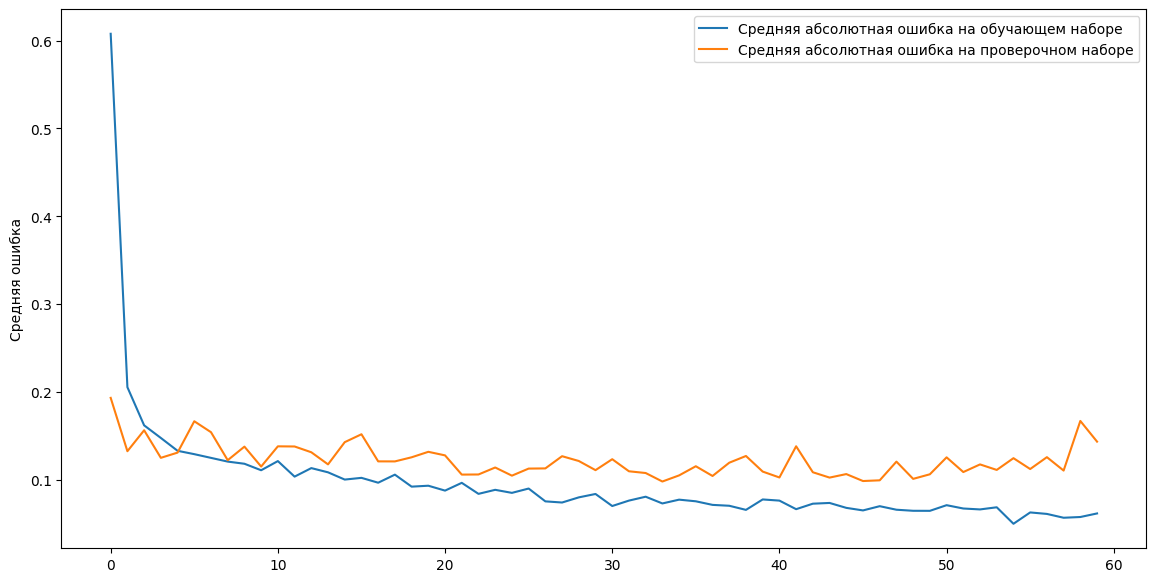

In [12]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['recall'], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_recall'], 
         label='Точность на проверочном наборе')
plt.ylabel('Точность')
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [43]:
#считывание и сортировка тестового датасета
test_df=pd.read_csv("./test_dataset_test.csv")
test_df=test_df.sort_index(axis=1)
test_df.head(7)

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",26,611,0.083038,0.196691,0.244827,0.000000,0.241219,0.259303,0.064947,...,0.719171,0.000000,0.593911,0.000000,0.000000,0.192016,0.164840,0.714292,0.065030,0.084197
1,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",98,6417,0.122470,0.091192,0.241003,0.000000,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.000000,0.007428,0.000000,0.106484,0.167479,0.000000,0.000000,0.108945
2,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",21,3352,0.259347,0.000000,0.297489,0.033368,0.000000,0.285057,0.374026,...,0.534127,0.000000,0.549128,0.000000,0.026141,0.469352,0.477381,0.037838,0.000000,0.158279
3,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",18,4224,0.166209,0.111243,0.000000,0.201012,0.083885,0.000000,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",53,3102,0.010862,0.000000,0.067479,0.234954,0.000000,0.000000,0.000000,...,0.000000,0.134136,0.780305,0.030224,0.046893,0.000000,0.779191,0.048622,0.650742,0.121296
5,"{""type"":""Polygon"",""coordinates"":[[[34.72318043...",24,6793,0.079736,0.111598,0.101091,0.050261,0.124638,0.115864,0.159296,...,0.057082,0.163208,0.612995,0.012369,0.168984,0.000000,0.655558,0.270466,0.000000,0.002891
6,"{""type"":""Polygon"",""coordinates"":[[[52.90075051...",83,5477,0.232567,0.000000,0.118827,0.279388,0.090533,0.094934,0.000000,...,0.414640,0.226099,0.026115,0.073684,0.181951,0.036680,0.456788,0.242861,0.042136,0.039800


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 69, 13)            780       
                                                                 
 dense_4 (Dense)             (None, 69, 300)           4200      
                                                                 
 dense_5 (Dense)             (None, 69, 120)           36120     
                                                                 
 dropout_2 (Dropout)         (None, 69, 120)           0         
                                                                 
 dense_6 (Dense)             (None, 69, 100)           12100     
                                                                 
 dropout_3 (Dropout)         (None, 69, 100)           0         
                                                                 
 flatten_1 (Flatten)         (None, 6900)             

In [46]:
test_df_nn.iloc[0].to_numpy()[1:69]

array([0.08303786, 0.19669079, 0.2448268 , 0.        , 0.24121888,
       0.25930305, 0.06494668, 0.06644568, 0.0525223 , 0.15311333,
       0.13335295, 0.10138009, 0.1365739 , 0.07529088, 0.        ,
       0.26974146, 0.05835253, 0.27322822, 0.15773288, 0.09999413,
       0.55221447, 0.60196451, 0.94402671, 0.07849863, 0.03078596,
       0.15911148, 0.12823562, 0.19732608, 0.80039267, 0.07966341,
       0.14059586, 0.05717716, 0.19460798, 0.1277325 , 0.18809152,
       0.02926635, 0.        , 0.        , 0.        , 0.        ,
       0.02104208, 0.71971628, 0.78143429, 0.78732572, 0.78892488,
       0.82632243, 0.77948817, 0.15723217, 0.05133428, 0.18829361,
       0.20000476, 0.79610898, 0.80795166, 0.72245632, 0.75195515,
       0.26386847, 0.08622886, 0.        , 0.74362129, 0.06805902,
       0.71917117, 0.        , 0.59391084, 0.        , 0.        ,
       0.19201586, 0.16483991, 0.71429249])

In [56]:
#выгрузка предсказаний на тестовом датасете
model  = load_model("./LSTM_Dense_best96_8.h5")
#model.summary()
def predict_crop(x):
    return np.argmax(model.predict(x))

test_df_nn = test_df.drop([".geo", "area"], axis = 1)
print(len(test_df_nn))

#print(test_df_nn.head(7))

x = []


for f in range(len(test_df_nn)):
    x+=  [[test_df_nn.iloc[f].to_numpy()[0], test_df_nn.iloc[f].to_numpy()[1:70]]]
x = np.array(x)

#print(x)
res_nn_list = []

for f in x:
    #print(f)
    res_nn_list += [[f[0], predict_crop(f[1].reshape((1,69)))]]


2071


C:\Users\slagt\AppData\Local\Temp\ipykernel_1136\590568509.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


In [57]:
print(res_nn_list[0])


[611.0, 3]


In [58]:
outputNN = pd.DataFrame(data=res_nn_list, columns=["id", 'crop'])

In [59]:
outputNN.to_csv("./outputNN.csv", index=False)
